# CODE TO PLOT THE SQUARE WAVE


$f(t) =
\begin{cases}
-1 & \text{for } -\frac{1}{2}T \leq t < 0, \\
+1 & \text{for } 0 \leq t < \frac{1}{2}T.
\end{cases}$

Here let  $\quad T = \pi$


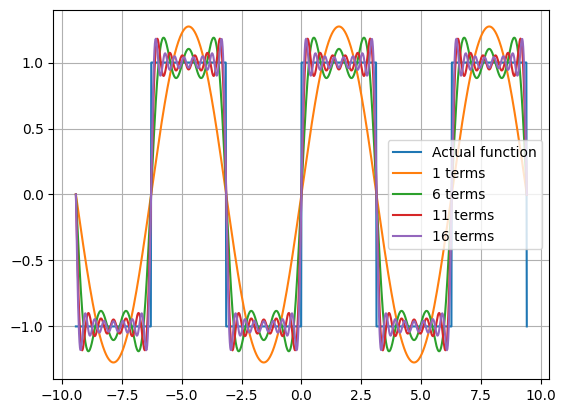

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def b(n):#coeffecients of sine
  return 2*(1-(-1)**n)/(np.pi*n)

def sqr_wave_approx(t, n):
  sum = 0
  for i in range(n+1):
    if i%2 != 0:
      sum += b(i)*np.sin(i*t)
  return sum

def sqr_wave_true(t):
  t = t % (2*np.pi)
  return np.where(t < np.pi, 1, -1)

t = np.linspace(-3*np.pi, 3*np.pi, 1000)
plt.plot(t, sqr_wave_true(t), label = 'Actual function')

for i in range(1, 20, 5):
  plt.plot(t, sqr_wave_approx(t, i), label = f'{i} terms')
plt.grid()
plt.legend()
plt.show()



# FINDING NUMBER OF TERMS REQUIRED FOR 1% ABSOLUTE ERROR

number of terms required for 1% error: 47
approx value at t = 0.04: 0.9980704260550105
absolute error: 0.19295739449894933


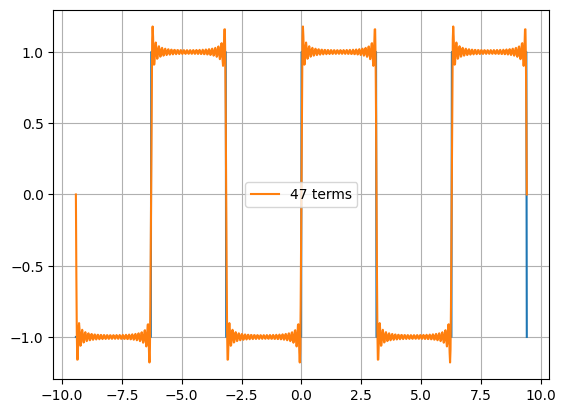

In [52]:
check = .04
true_val = sqr_wave_true(check)

def if_outside_tol(n, tol):
  # print(sqr_wave_approx(check, n))
  return abs((true_val - sqr_wave_approx(check, n))*100/true_val) > tol

n = 1
tol = 1

while if_outside_tol(n, tol):
  n += 1


print(f'number of terms required for 1% error: {n}')
print(f'approx value at t = {check}: {sqr_wave_approx(check, n)}')
print(f'absolute error: {(true_val - sqr_wave_approx(check, n))*100/true_val}')

plt.plot(t, sqr_wave_true(t))
plt.plot(t, sqr_wave_approx(t, n), label = f'{n} terms')
plt.grid()
plt.legend()
plt.show()


# NUMBER OF TERMS REQUIRED FOR CONVERGENCE AS A FUNCTION OF DISTANCE FROM DISCONTINUITY

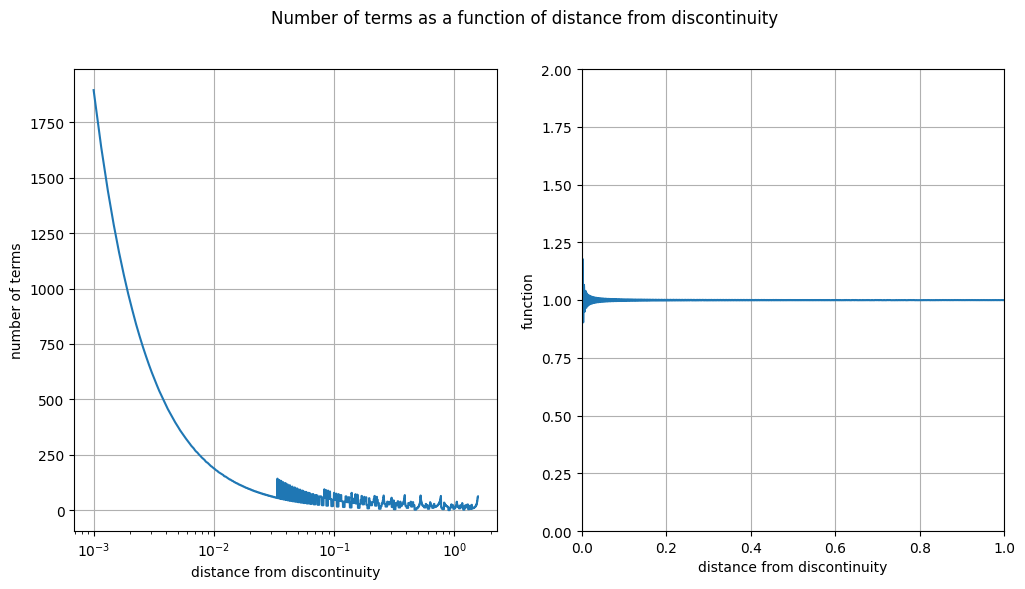

In [58]:
def if_converging(i, t, tol = 1):
    actual_val = sqr_wave_true(t)
    approx = sqr_wave_approx(t, i)
    error = abs((actual_val - approx)*100/actual_val)
    return error > tol

def terms_find(t):
    i = 0
    while if_converging(i, t):
        i += 1
    return i    

def make_plot(T):
    terms = []
    for t in T:
        terms.append(terms_find(t))
    return terms

T = np.linspace(0.001, np.pi/2, 10000)
terms = make_plot(T)
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
axs[0].set_xlabel('distance from discontinuity')
axs[0].set_ylabel('number of terms')
axs[0].grid()
axs[0].plot(T, terms)    
axs[0].set_xscale('log')
# axs[0].scatter(T, terms, s = 5, color = 'red')    

axs[1].axis([0, 1, 0, 2])
axs[1].grid()
axs[1].set_xlabel('distance from discontinuity')
axs[1].set_ylabel('function')
axs[1].plot( T, sqr_wave_approx(T, 1750))
plt.suptitle('Number of terms as a function of distance from discontinuity')
plt.show()       


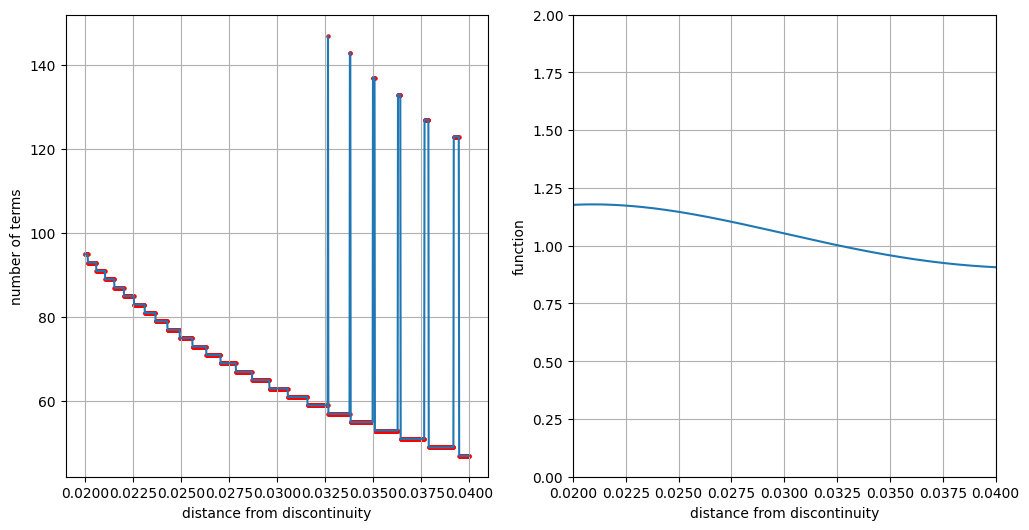

In [51]:
T = np.linspace(0.02, .04, 1000)
terms = make_plot(T)
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
axs[0].set_xlabel('distance from discontinuity')
axs[0].set_ylabel('number of terms')
axs[0].grid()
axs[0].plot(T, terms)    
# axs[0].set_xscale('log')
axs[0].scatter(T, terms, s = 5, color = 'red')    

axs[1].axis([.02, .04, 0, 2])
axs[1].grid()
axs[1].set_xlabel('distance from discontinuity')
axs[1].set_ylabel('function')
axs[1].plot( T, sqr_wave_approx(T, 150))
plt.show()  

# ERROR AS A FUCNTION OF NUMBRER OF TERMS 

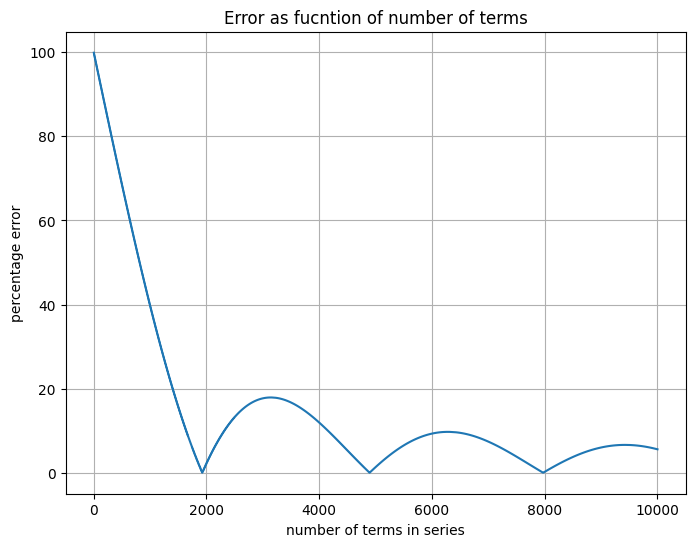

In [61]:
def error(i, t):
    actual_val = sqr_wave_true(t)
    approx = sqr_wave_approx(t, i)
    # print(actual_val,approx,'\n')
    error = abs((actual_val - approx)*100/actual_val)
    return error

def plot_error_n(numlist, t):
    error_n = []
    for i in numlist:
        error_n.append(error(i, t))
    return error_n

n = 10000
pos = 0.001
numlist = [i for i in range(2, n+1)]

plt.figure(figsize=(8, 6))
plt.grid(True)
plt.xlabel('number of terms in series')
plt.ylabel('percentage error')
plt.plot(numlist, plot_error_n(numlist, pos))   
plt.title('Error as fucntion of number of terms')
plt.show() 
